In [1]:
import json
import pprint
from graphviz import Digraph
from pymongo import MongoClient

In [2]:
with open('../user.config') as f:
    user = json.loads(f.read())

client = MongoClient(user["mongo_atlas"])
db = client["IDM"]

In [3]:
policy = db.policies.find_one({"_id": "Acc21_Pol1"})

In [4]:
pprint.pprint(policy)

{'_id': 'Acc21_Pol1',
 'acc_id': 'Acc_21',
 'covered_perils': ['EQ', 'FL', 'WS', 'FI'],
 'expiration_date': datetime.datetime(2018, 12, 31, 0, 0),
 'inception_date': datetime.datetime(2018, 1, 1, 0, 0),
 'layers': [{'covers': ['InsObj_21_1',
                        'InsObj_21_2',
                        'InsObj_21_3',
                        'InsObj_21_4'],
             'feeds_into': ['layer_2_1_1'],
             'layer_id': 'layer_1_1_1',
             'terms': {'deductible': [{'type': 'fixed amount',
                                       'value': 58500.0}]}},
            {'covers': ['InsObj_21_5',
                        'InsObj_21_6',
                        'InsObj_21_7',
                        'InsObj_21_8'],
             'feeds_into': ['layer_2_1_1'],
             'layer_id': 'layer_1_2_1',
             'terms': {'deductible': [{'type': 'fixed amount',
                                       'value': 58500.0}]}},
            {'covers': ['layer_1_1_1', 'layer_1_2_1'],
            

In [5]:
dot = Digraph(comment='Policy')

for layer in policy["layers"]:
    dot.attr("node", shape="rectangle")
    dot.node(layer["layer_id"], str(layer["terms"]))
    for cov in layer["covers"]:
        dot.attr("node", shape="circle")
        if cov.startswith("InsObj"):
            dot.node(cov, cov)
        
for layer in policy["layers"]:
    for cov in layer["covers"]:
        dot.edge(cov, layer["layer_id"])
    if "policy_loss" in layer["feeds_into"]:
        print(layer["layer_id"])
        dot.edge(layer["layer_id"], "policy_loss")

layer_3_1_1


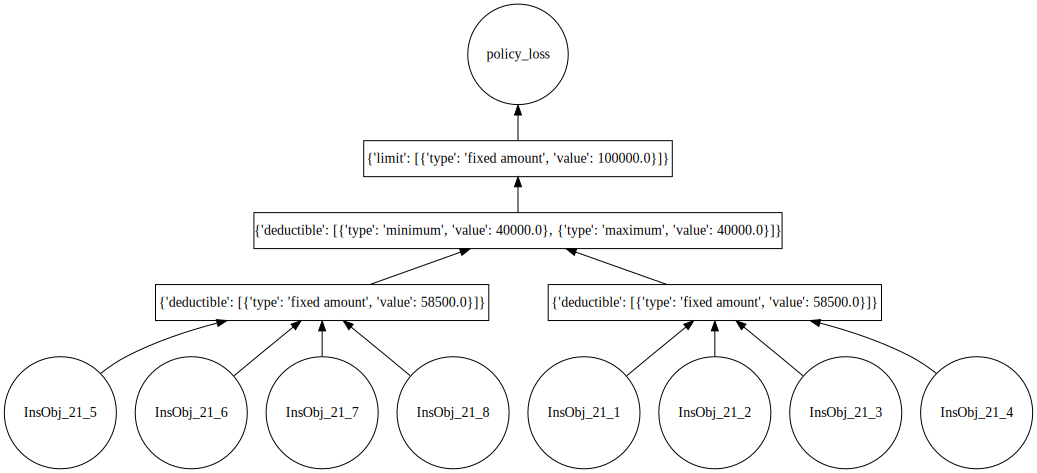

In [6]:
dot.attr(rankdir="BT")
dot